# CountVectorizer

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
lines = [
 'Four score and 7 years ago our fathers brought forth,',
 '... a new NATION, conceived in liberty $$$,',
 'and dedicated to the PrOpOsItIoN that all men are created equal',
 'One nation\'s freedom equals #freedom for another $nation!'
]

In [3]:
# Vectorize the lines
vectorizer = CountVectorizer(stop_words='english')
word_matrix = vectorizer.fit_transform(lines)
# Show the resulting word matrix
feature_names = vectorizer.get_feature_names_out()
line_names = [f'Line {(i + 1):d}' for i, _ in enumerate(word_matrix)]
df = pd.DataFrame(data=word_matrix.toarray(), index=line_names,
 columns=feature_names)
df.head()


,ago,brought,conceived,created,dedicated,equal,equals,fathers,forth,freedom,liberty,men,nation,new,proposition,score,years
Line 1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1
Line 2,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0
Line 3,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0
Line 4,0,0,0,0,0,0,1,0,0,2,0,0,2,0,0,0,0


Observe from the output that equal and equals count as separate words, even
though they have similar meaning. Data scientists sometimes go a step further when preparing text for machine learning by stemming or lemmatizing words. If the preceding text were stemmed, all occurrences of equals would be converted to equal.

 stemming  

lemmatizing

NLTK

In [4]:
import re

def preprocess_text(text):
    return re.sub(r'\d+', '', text).lower()

vectorizer = CountVectorizer(stop_words='english', preprocessor=preprocess_text)
word_matrix = vectorizer.fit_transform(lines)


# Sentiment Analysis

In [24]:
import pandas as pd
df = pd.read_csv('C:/Users/IDEH/Desktop/Sentimental/Applied ML/reviews.csv', encoding='ISO-8859-1')
df.head()

,Text,Sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       50000 non-null  object
 1   Sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [7]:
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          25000  24697  When i got this movie free from my job, along ...   
1          25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
Sentiment       
0            3  
1            5

In [8]:
df = df.drop_duplicates()
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          24697  24697  Once again Mr. Costner has dragged out a movie...   
1          24884  24884  I went and saw this movie last night after bei...   

                
          freq  
Sentiment       
0            1  
1            1

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000, random_state=0)

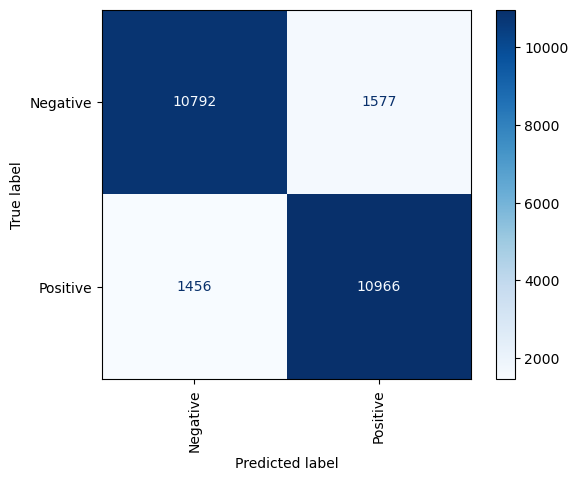

In [12]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
cmd.from_estimator(model, x_test, y_test, display_labels=['Negative', 'Positive'],cmap='Blues', xticks_rotation='vertical')

In [17]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)

In [18]:
# Make predictions on the test data
y_pred = model.predict(x_test)


In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred, average='binary')
print(f"Recall: {recall:.2f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("\nClassification Report:\n", report)


Accuracy: 0.88
Precision: 0.87
Recall: 0.88
F1 Score: 0.88

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.87      0.88     12369
    Positive       0.87      0.88      0.88     12422

    accuracy                           0.88     24791
   macro avg       0.88      0.88      0.88     24791
weighted avg       0.88      0.88      0.88     24791



In [20]:
text = 'The long lines and poor customer service really turned me off'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.0914729373314221

In [21]:
text = 'The food was great and the service was excellent!'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.8579338868374013

In [22]:
text = 'f this awful scenes'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.11715582836388011

In [23]:
text = 'i feel like it the best movie i have ever seen'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.8421839244180919